In [2]:
import numpy as np
import matplotlib.pyplot as plt


# LOAD THE LIST OF CLASSES
words = open("../data/speech-comands/classes.txt").read().split()

# LOAD THE TRAINING AND TEST DATA
data = np.load("../data/speech-comands/train.npz")
Xtrain = data["arr_0"]
Ytrain = data["arr_1"]
print(Xtrain.shape, Ytrain.shape)
data = np.load("../data/speech-comands/test.npz")
Xtest = data["arr_0"]
Ytest = data["arr_1"]
print(Xtest.shape, Ytest.shape)
spectrogram = Xtrain[0, :].reshape(20, 80)

(84291, 1600) (84291,)
(9376, 1600) (9376,)


## 1.1 Visualize the data

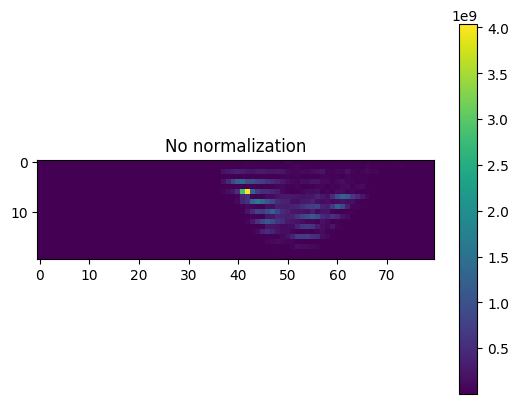

In [3]:
import trainmodel as tm
spectrogram_no_norm = Xtrain[0, :].reshape(20, 80)
plt.imshow(spectrogram_no_norm)
plt.colorbar()
plt.title("No normalization")
plt.show()

## 1.2 Feature normalization


Text(0.5, 1.0, 'whitening')

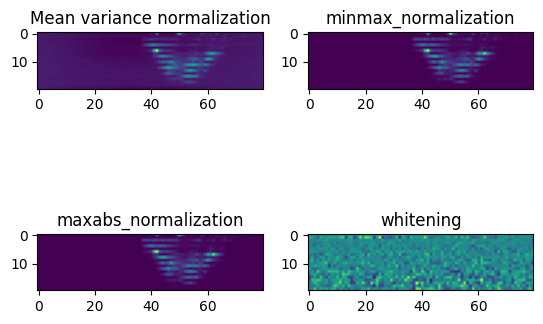

In [17]:
import trainmodel as tm

xTrainMV, xTestMV = tm.mean_variance_normalization(Xtrain, Xtest)
spectrogram_mean_var = xTrainMV[0, :].reshape(20, 80)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(spectrogram_mean_var)
axs[0, 0].set_title("Mean variance normalization")

xTrain, xTest = tm.minmax_normalization(Xtrain, Xtest)
spectrogram_min_max = xTrain[0, :].reshape(20, 80)

axs[0, 1].imshow(spectrogram_min_max)
axs[0, 1].set_title("minmax_normalization")

xTrainMA, xTestMA = tm.maxabs_normalization(Xtrain, Xtest)
spectrogram_max_abs = xTrainMA[0, :].reshape(20, 80)

axs[1, 0].imshow(spectrogram_max_abs)
axs[1, 0].set_title("maxabs_normalization")

xTrain, xTest = tm.whitening(Xtrain, Xtest)
spectrogram_whitning = xTrain[0, :].reshape(20, 80)

axs[1, 1].imshow(spectrogram_whitning)
axs[1, 1].set_title("whitening")

## 1.3 Train a neural network
Train a neural network for spoken digit recognition. Define and train a multilayer per-
ceptron without hidden layers. Train and evaluate it. Try with batch gradient descent
and with stochastic gradient descent with minibatches of different size.  
50 epoch 

In [ ]:
import trainmodel as tm
import pvml
import pandas as pd
xTrainMV, xTestMV = tm.mean_variance_normalization(Xtrain, Xtest)
m = xTrainMV.shape[0]
net = pvml.MLP([1600, 35])
plt.ion()
train_accs = []
test_accs = []
batch_sizes = []
epochs = []
for batch_size in [10, 20, 50, 100, 200]:
    for epoch in range(50):
        net.train(xTrainMV, Ytrain, 1e-4, steps=m // batch_size,
                  batch=batch_size)
        if epoch % 10 == 0:
            train_acc = tm.accuracy(net, xTrainMV, Ytrain)
            test_acc = tm.accuracy(net, xTestMV, Ytest)
            print(epoch, train_acc, test_acc)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            batch_sizes.append(batch_size)
            epochs.append(epoch)
net.save("model.npz")
result = pd.DataFrame({'Train accuracy': train_accs,
                      'Test accuracy': test_accs, 'Batch size': batch_sizes,"epoch":epochs})
result.to_csv("accuracies_diff_batch_size.csv", index=True)
result=result.pivot(index="epoch",columns="Batch size",values="Test accuracy")
result.plot(x="epoch", y="Test accuracy", kind="line")

<Axes: title={'center': 'Test accuracy vs epoch for different batch sizes'}, xlabel='epoch', ylabel='Test accuracy'>

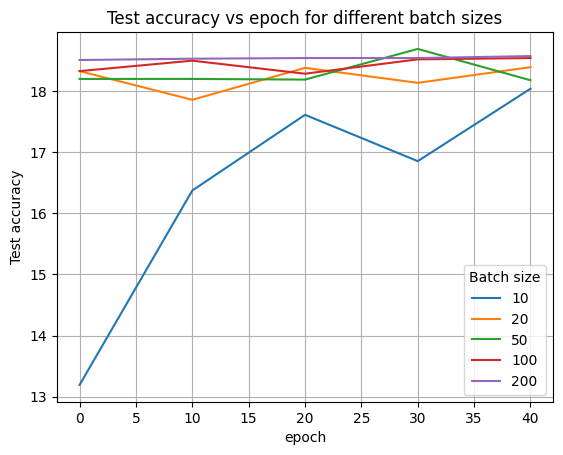

In [18]:
result=pd.read_csv("accuracies_diff_batch_size.csv")
result=result.pivot(index="epoch",columns="Batch size",values="Test accuracy")
result.plot(kind="line",grid=True, title="Test accuracy vs epoch for different batch sizes", ylabel="Test accuracy") 


## 1.4 Network architecture

Add one or more hidden layers. Try with layers of different width. What is the best
architecture for this problem?

50 epoch

| Hidden layers | Structure                 |
| ------------- | ------------------------- |
| 0             | 1600 + 35                 |
| 1             | 1600 + 256 + 35           |
| 1             | 1600 + 128 + 35           |
| 1             | 1600 + 56 + 35            |
| 2             | 1600 + 256 + 128 + 35     |
| 2             | 1600 + 256 + 56 + 35      |
| 3             | 1600 + 256 + 128 + 56 +35 |


In [22]:
import trainmodel as tm
import pvml
import pandas as pd
xTrainMV, xTestMV = tm.mean_variance_normalization(Xtrain, Xtest)
train_accs = []
test_accs = []
structures = []
epochs = []
lambdas = []
batch_size = 100
structures = [[1600, 35], [1600, 256, 35], [1600, 128, 35], [1600, 56, 35], [
    1600, 256, 128, 35], [1600, 256, 56, 35], [1600, 256, 128, 56, 35]]
m = xTrainMV.shape[0]
for structure in structures:
    print(structure)
    net = pvml.MLP(structure)
    for epoch in range(51):
        net.train(xTrainMV, Ytrain, 1e-4, steps=m // batch_size,
                  batch=batch_size)
        if epoch % 10 == 0:
            train_acc = tm.accuracy(net, xTrainMV, Ytrain)
            test_acc = tm.accuracy(net, xTestMV, Ytest)
            print(epoch, train_acc, test_acc)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            structures.append(str(structure))
            epochs.append(epoch)
            lambdas.append(0.00001)

    net.save("model"+str(structure)+"50_iter_normal.npz")


result = pd.DataFrame({'Train accuracy': train_accs,
                      'Test accs': test_accs, 'structure': structures, "Epoch": epochs})
result.to_csv("accuracies_diff_structures.csv", index=True)

0 12.002467641859747 11.305460750853243
10 21.78287124366777 17.09684300341297
20 24.05950813254084 17.427474402730375
30 25.110628655491098 18.014078498293514
40 25.90430769595805 18.206058020477816
50 26.595959236454664 18.344709897610922
0 12.191099880177006 11.273464163822526
10 30.789764031747165 22.95221843003413
20 39.81207958144998 28.444965870307165
30 45.83051571342136 31.28199658703072
40 50.81799954918081 33.68174061433447
50 54.77453108872833 35.5268771331058
0 11.889762845380883 11.550767918088738
10 27.97926231744789 21.501706484641637
20 35.40235612342955 25.67192832764505
30 41.368592139137036 29.447525597269625
40 46.104566323806814 31.868600682593858
50 49.864161061086 33.83105802047782
0 10.367654909776844 9.67363481228669
10 24.264749498760246 19.379266211604097
20 30.245221909812436 22.749573378839592
30 34.22073530981955 25.117320819112628
40 36.98971420436345 26.610494880546078
50 39.82394324423723 27.91168941979522
0 10.905078834039221 10.505546075085324
10 32.

TypeError: 'str' object cannot be interpreted as an integer

| Hidden layer | Structure                         |
| ------------ | --------------------------------- |
| 0            | 1600 + 35                         |
| 1            | 1600 + 512 + 35                   |
| 2            | 1600 + 256 + 256 + 35             |
| 3            | 1600 + 256 + 128 + 128 + 35       |
| 4            | 1600 + 128 + 128 + 128 + 128 + 35 |


In [39]:
import trainmodel as tm
import pvml
import pandas as pd
xTrainMV, xTestMV = tm.mean_variance_normalization(Xtrain, Xtest)
train_accs = []
test_accs = []
structures = []
batch_size = 200
structure = [[1600, 512, 35], [1600, 256, 256, 35], [
    1600, 256, 128, 128, 35], [1600, 128, 128, 128, 128, 35]]
m = xTrainMV.shape[0]
for struct in structure:
    net = pvml.MLP(struct)
    
    for epoch in range(51):
        net.train(xTrainMV, Ytrain, 1e-4, steps=m // batch_size,
                  batch=batch_size)
        if epoch == 50:
            train_acc = tm.accuracy(net, xTrainMV, Ytrain)
            test_acc = tm.accuracy(net, xTestMV, Ytest)
            print(epoch, train_acc, test_acc)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            structures.append(struct)
    net.save("model"+str(struct)+"V2.npz")


result = pd.DataFrame({'Train accuracy': train_accs,
                      'Test accs': test_accs, 'structure': structures})
result.to_csv("accuracies_diff_structureVV2.csv", index=True)

50 46.34895777722414 32.87116040955632
50 52.87753140904723 35.718856655290104
50 56.79728559395427 36.262798634812285
50 55.262127629284265 35.3348976109215


## 1.5 Analysis

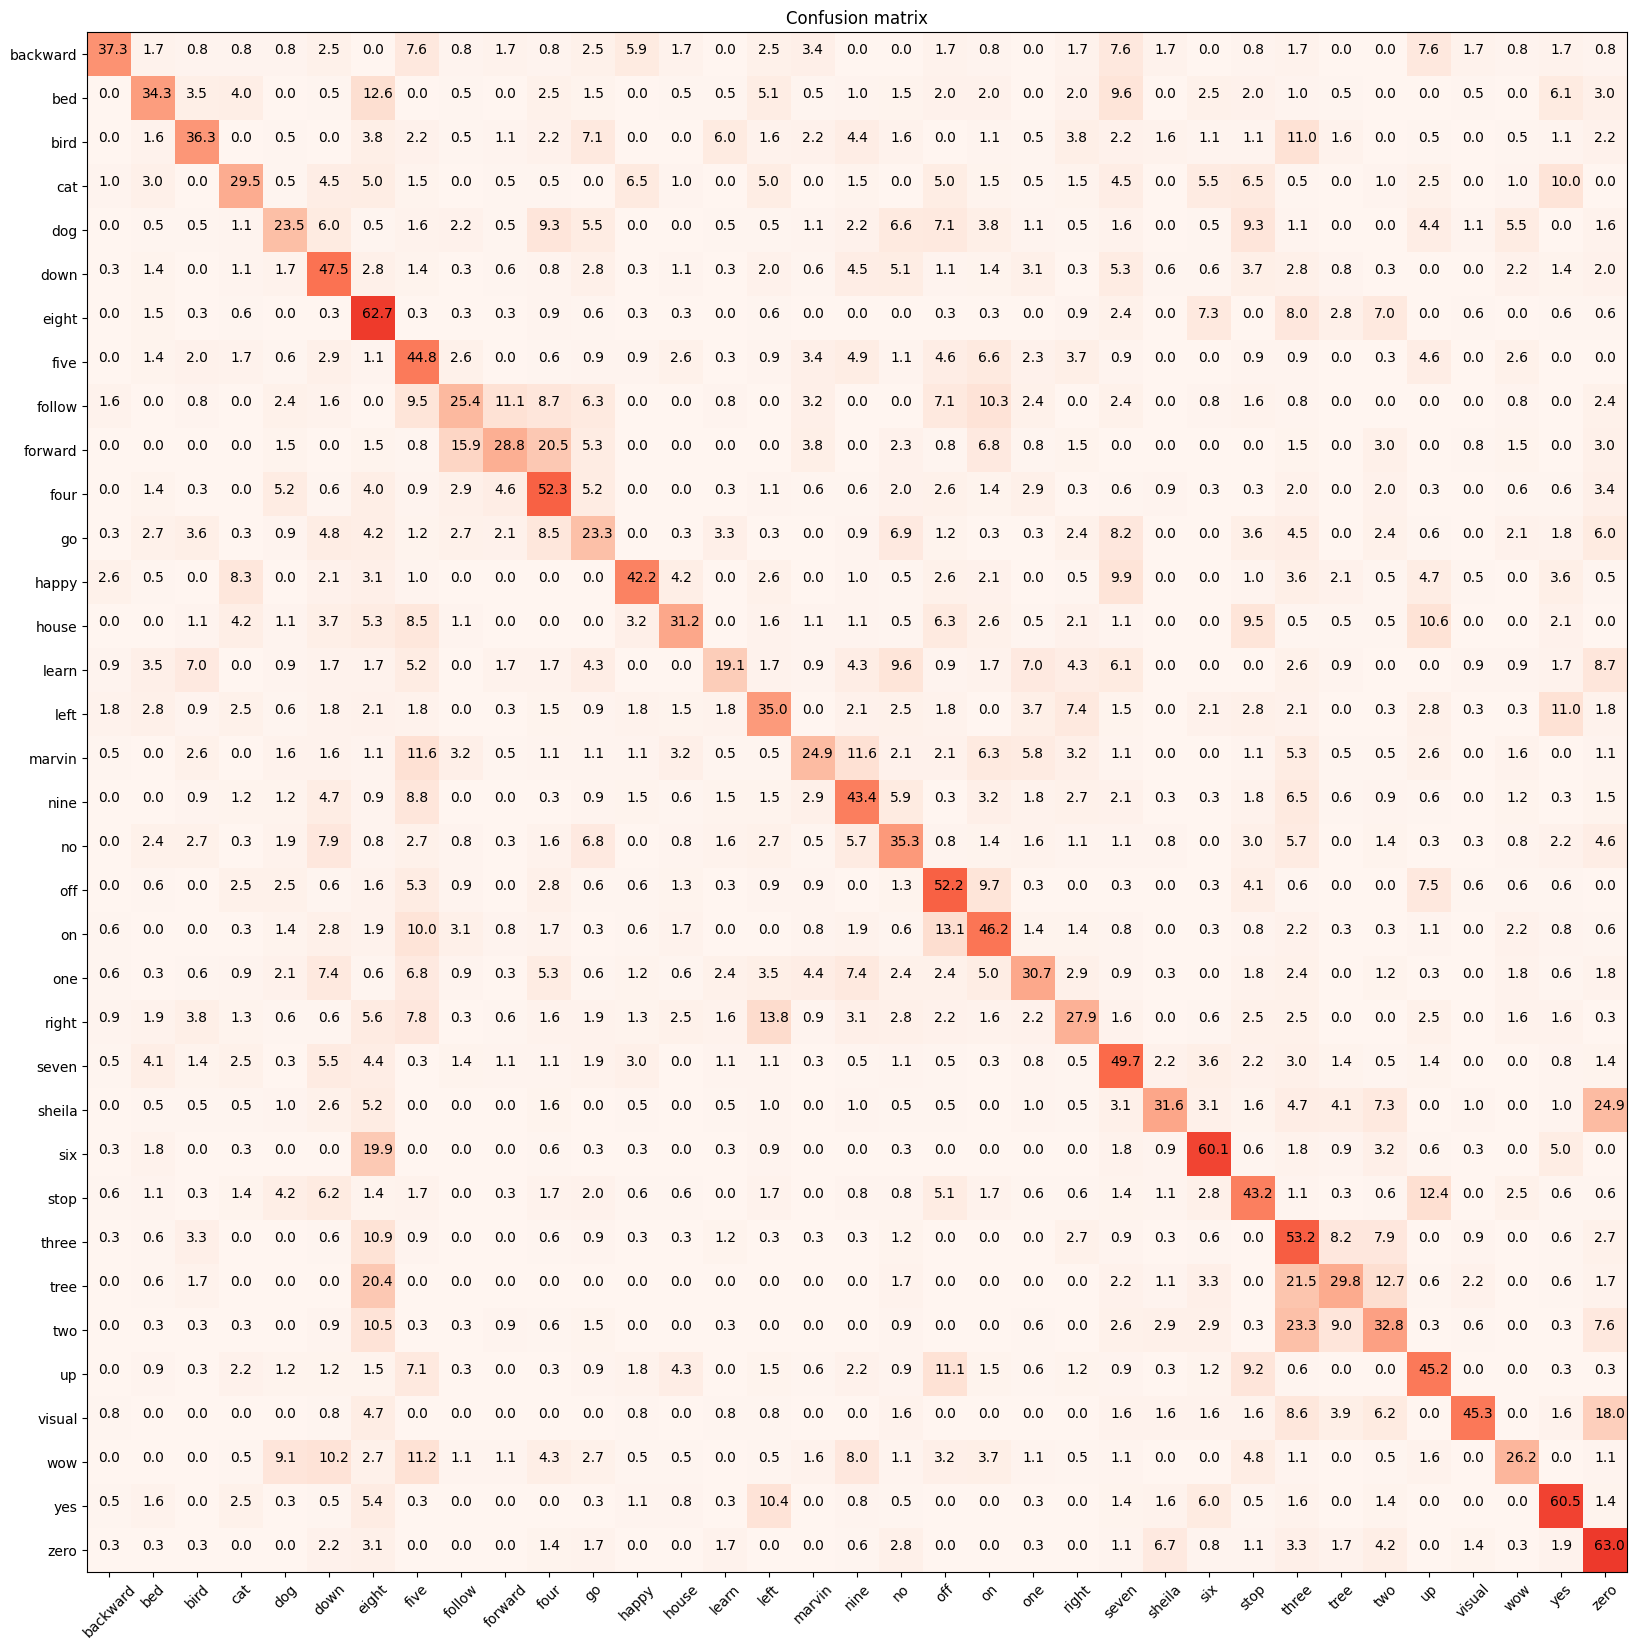

In [38]:
import analysis as an
import trainmodel as tm
import pvml
xTrainMV, xTestMV = tm.mean_variance_normalization(Xtrain, Xtest)
network = pvml.MLP.load("model[1600, 256, 128, 56, 35]100.npz")
predictions, logits = network.inference(xTestMV)
cmat = an.make_confusion_matrix(predictions, Ytest)
an.show_confusion_matrix(Ytest, predictions, words)